In [10]:
import pygwalker as pyg
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("data/sample_data.csv", parse_dates=['date'])
df	

,id,first name,last name,department,in_time,out_time,age,course,date,phone_number,email,gender,attendance,absences,works,group
0,1,First1,Last1,tourism,09:25,13:09,17,1,2024-03-18,1234567891,email1@example.com,Male,20,2,True,AT-83
1,2,First2,Last2,corporate governance,10:08,18:33,24,2,2024-03-26,1234567892,email2@example.com,Female,15,1,True,AT-81
2,3,First3,Last3,tourism,10:31,16:41,22,1,2024-04-04,1234567893,email3@example.com,Male,19,7,False,BDA-62
3,4,First4,Last4,tourism,10:14,14:51,24,2,2024-03-04,1234567894,email4@example.com,Male,32,6,False,MNP-76
4,5,First5,Last5,accounting,09:17,20:10,29,2,2024-03-31,1234567895,email5@example.com,Female,15,9,True,KB-91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,First99996,Last99996,tourism,09:34,15:05,24,4,2024-03-25,12345678999996,email99996@example.com,Female,12,3,False,AT-83
99996,99997,First99997,Last99997,corporate governance,09:01,17:58,23,4,2024-03-13,12345678999997,email99997@example.com,Male,12,2,False,BR-76
99997,99998,First99998,Last99998,accounting,09:33,15:19,25,2,2024-03-12,12345678999998,email99998@example.com,Male,22,2,True,MO-91
99998,99999,First99999,Last99999,digital technology,09:24,20:27,34,3,2024-03-30,12345678999999,email99999@example.com,Female,27,2,False,BDA-82


In [31]:
pyg.walk(df)

Box(children=(HTML(value='<div id="ifr-pyg-0006152e0c6132c8adgjSe35PJmpWLTB" style="height: auto">\n    <head>…

In [5]:
df.head()

,id,first name,last name,department,in_time,out_time,age,course,date,phone_number,email,gender,attendance,absences,works,group
0,1,First1,Last1,tourism,09:25,13:09,17,1,2024-03-18,1234567891,email1@example.com,Male,20,2,True,AT-83
1,2,First2,Last2,corporate governance,10:08,18:33,24,2,2024-03-26,1234567892,email2@example.com,Female,15,1,True,AT-81
2,3,First3,Last3,tourism,10:31,16:41,22,1,2024-04-04,1234567893,email3@example.com,Male,19,7,False,BDA-62
3,4,First4,Last4,tourism,10:14,14:51,24,2,2024-03-04,1234567894,email4@example.com,Male,32,6,False,MNP-76
4,5,First5,Last5,accounting,09:17,20:10,29,2,2024-03-31,1234567895,email5@example.com,Female,15,9,True,KB-91


In [6]:
df.describe()

,id,age,course,date,phone_number,attendance,absences
count,100000.000000,100000.000000,100000.000000,100000,1.000000e+05,100000.000000,100000.000000
mean,50000.500000,25.512120,2.501570,2024-03-18 00:11:34.655999744,1.122458e+13,17.994070,4.477930
min,1.000000,16.000000,1.000000,2024-03-01 00:00:00,1.234568e+09,0.000000,0.000000
25%,25000.750000,21.000000,1.000000,2024-03-09 00:00:00,1.234568e+13,9.000000,2.000000
50%,50000.500000,26.000000,3.000000,2024-03-18 00:00:00,1.234568e+13,18.000000,4.000000
75%,75000.250000,31.000000,4.000000,2024-03-27 00:00:00,1.234568e+13,27.000000,7.000000
max,100000.000000,35.000000,4.000000,2024-04-04 00:00:00,1.234568e+14,36.000000,9.000000
std,28867.657797,5.756668,1.119808,NaN,3.387164e+12,10.689477,2.874334


In [7]:
df['department'].value_counts()

department
economics               20181
digital technology      20027
tourism                 19985
corporate governance    19904
accounting              19903
Name: count, dtype: int64

In [8]:
df['gender'].value_counts()

gender
Female    50001
Male      49999
Name: count, dtype: int64

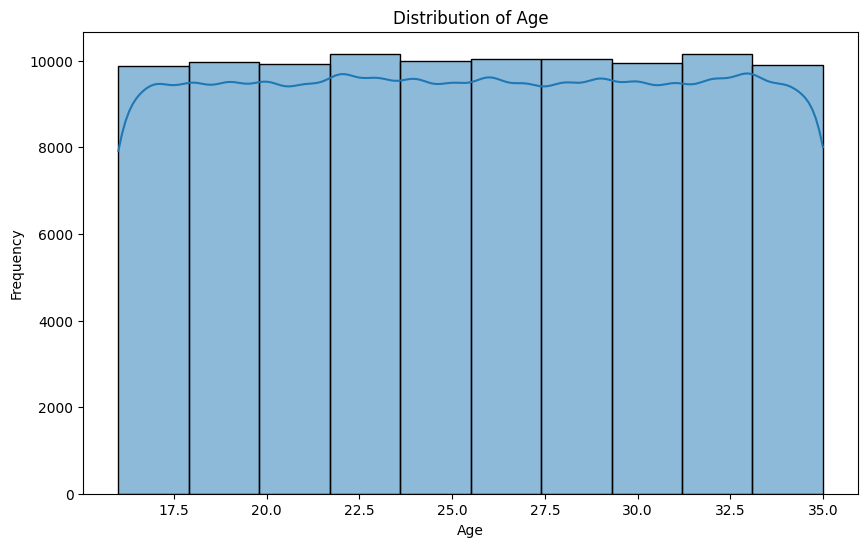

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=10, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

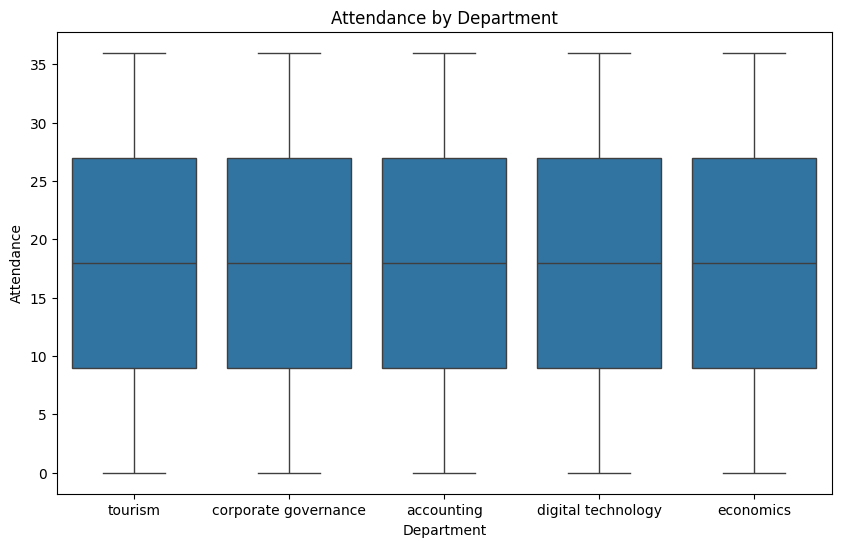

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='department', y='attendance', data=df)
plt.title('Attendance by Department')
plt.xlabel('Department')
plt.ylabel('Attendance')
plt.show()

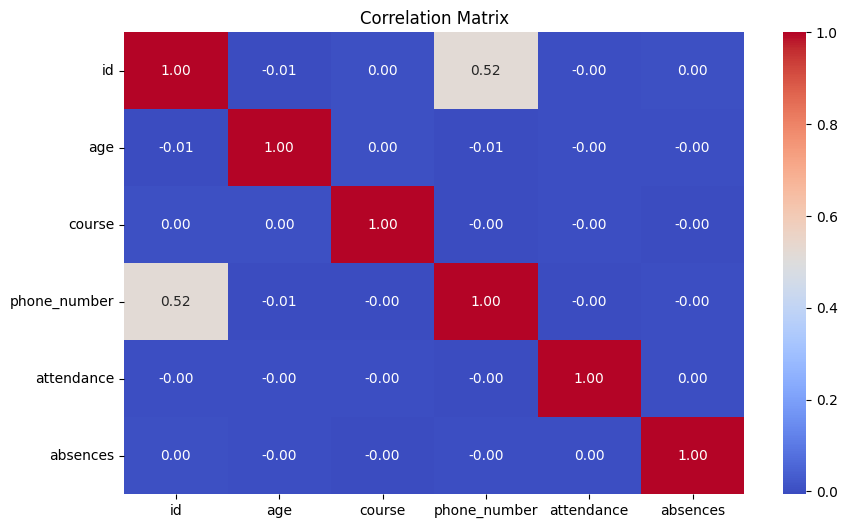

In [16]:
# Correlation Analysis
df_selected = df.select_dtypes(include=['int'])
correlation_matrix = df_selected.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()